### Overview of the Dataset used for K-Means Clustering

Online retail is a transnational data set (obtained from UCI <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">here</a>) which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Steps for Clustering

1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final Analysis and recommendations

## 1. Read and understand the data

In [1]:
# Import required librarires

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
retail_df = pd.read_csv('Online_Retail.csv',encoding_errors='ignore')

# As their was encoding errors while reading the file, ignored it for now

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail_df.shape

(541909, 8)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2. Clean the data

In [6]:
# Check for null data
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# percentage of null values in the entire dataset
round((retail_df.isnull().sum())/len(retail_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# drop all rows having missing values as it will impact our modeling

retail_df = retail_df.dropna()

In [9]:
# recheck the data frame post null value cleanup
retail_df.shape

(406829, 8)

In [10]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 3. Data Preparation

#### Prepare online retail data based on RFM

- R (Recency) - Number of days since last purchase
- F (Frequency) - Number of transactions
- M (Monetary) - Total amount of transactions (revenue contributed)


So the dataframe for our algorithm can have cust_id, recency, frequency and monetary

In [11]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [12]:
# Find the total amount spent by each customer for a particular transaction
retail_df['Amount'] = retail_df.Quantity * retail_df.UnitPrice

In [13]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [14]:
# identify the monetary value for each customer

grouped_retail_df = retail_df.groupby(by = ['CustomerID'])['Amount'].sum()

In [15]:
grouped_retail_df

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [16]:
grouped_retail_df.reset_index()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [17]:
# Next identify the frequency for each customer

frequency_df = retail_df.groupby(by = ['CustomerID'])['InvoiceNo'].count()

In [18]:
frequency_df.reset_index()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [19]:
grouped_retail_df = pd.merge(grouped_retail_df, frequency_df, on='CustomerID', how = 'inner')

In [20]:
grouped_retail_df.head()

,Amount,InvoiceNo
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


In [21]:
grouped_retail_df.reset_index()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [22]:
grouped_retail_df.rename(columns = {'CustomerID':'CustomerID','Amount':'Monetary','InvoiceNo':'Frequency'}, inplace=True)

In [23]:
grouped_retail_df

,Monetary,Frequency
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [24]:
# Next is to identify the recency of the transactions

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [25]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [26]:
# convert InvoiceDate from object type to Datetime

retail_df.InvoiceDate = pd.to_datetime(retail_df.InvoiceDate, format='%d-%m-%Y %H:%M')

In [27]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [29]:
# Max date of the transaction for entire dataset

max_date = max(retail_df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [30]:
# Compute the diff between each transaction and max_date

retail_df['TransactionDiff'] = max_date - retail_df.InvoiceDate

In [31]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,TransactionDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [32]:
# finally create the recency column

recency = retail_df.groupby(by=['CustomerID'])['TransactionDiff'].min()

In [33]:
recency

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
                 ...       
18280.0   277 days 02:58:00
18281.0   180 days 01:57:00
18282.0     7 days 01:07:00
18283.0     3 days 00:48:00
18287.0    42 days 03:21:00
Name: TransactionDiff, Length: 4372, dtype: timedelta64[ns]

In [34]:
recency.reset_index()

,CustomerID,TransactionDiff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [35]:
grouped_retail_df = pd.merge(grouped_retail_df, recency, on='CustomerID', how = 'inner')

In [36]:
grouped_retail_df

,Monetary,Frequency,TransactionDiff
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00
...,...,...,...
18280.0,180.60,10,277 days 02:58:00
18281.0,80.82,7,180 days 01:57:00
18282.0,176.60,13,7 days 01:07:00


In [37]:
grouped_retail_df.rename(columns={'TransactionDiff':'Recency'},inplace=True)

In [38]:
grouped_retail_df.head()

,Monetary,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325 days 02:33:00
12347.0,4310.00,182,1 days 20:58:00
12348.0,1797.24,31,74 days 23:37:00
12349.0,1757.55,73,18 days 02:59:00
12350.0,334.40,17,309 days 20:49:00


In [39]:
# standardisation

grouped_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Monetary   4372 non-null   float64        
 1   Frequency  4372 non-null   int64          
 2   Recency    4372 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.6 KB


In [40]:
# Change recency to number of days for standardisation process and eliminate the hour and seconds details
grouped_retail_df.Recency = grouped_retail_df.Recency.dt.days

In [41]:
grouped_retail_df.head()

,Monetary,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


#### Next steps
 - Outlier treatment ways
   1. Statistical
   2. Domain
 - Rescaling

<Axes: ylabel='Monetary'>

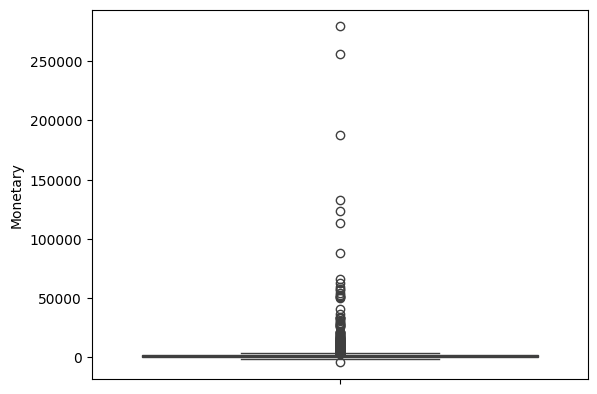

In [42]:
sns.boxplot(grouped_retail_df.Monetary)

<Axes: ylabel='Frequency'>

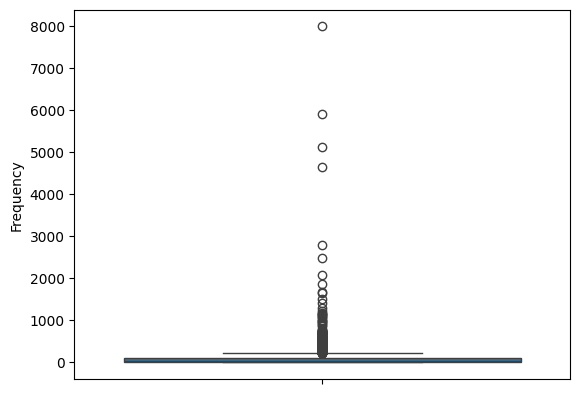

In [43]:
sns.boxplot(grouped_retail_df.Frequency)

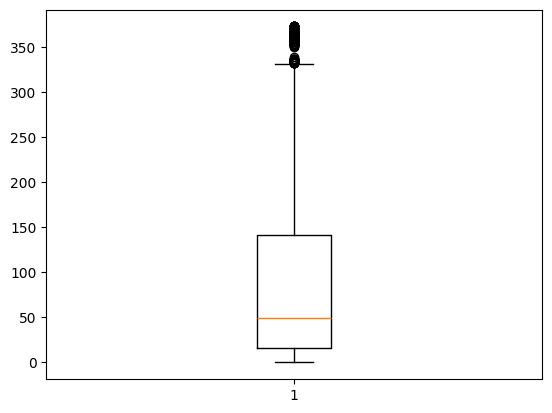

In [44]:
plt.boxplot(grouped_retail_df.Recency)
plt.show()

In [45]:
# These above outliers could be valid in perspective of Retail as there could be customers who would have spent huge on some gifts. 
# We can cluster them as different group so not eliminating them

In [46]:
grouped_retail_df.reset_index(inplace=True)

In [47]:
grouped_retail_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [48]:
rfm_df = grouped_retail_df[['Recency','Frequency','Monetary']]

In [49]:
rfm_df.head()

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [50]:
# Rescaling

#instantiate a scaler

scaler = StandardScaler()

In [51]:
#fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [52]:
rfm_df_scaled.shape

(4372, 3)

In [53]:
rfm_df_scaled

array([[ 2.32202285, -0.3917197 , -0.23100099],
       [-0.89373323,  0.38265697,  0.29343167],
       [-0.1691956 , -0.26695902, -0.01231622],
       ...,
       [-0.83418219, -0.34439668, -0.20951263],
       [-0.87388289,  2.85205812,  0.02390005],
       [-0.48680114, -0.0991774 , -0.00744423]])

In [54]:
type(rfm_df_scaled) # numpy array

numpy.ndarray

In [55]:
# Convert it into dataframe for further steps

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

In [56]:
rfm_df_scaled

,0,1,2
0,2.322023,-0.391720,-0.231001
1,-0.893733,0.382657,0.293432
2,-0.169196,-0.266959,-0.012316
3,-0.725005,-0.086271,-0.017146
4,2.163220,-0.327188,-0.190312
...,...,...,...
4367,1.845615,-0.357303,-0.209026
4368,0.882873,-0.370209,-0.221167
4369,-0.834182,-0.344397,-0.209513
4370,-0.873883,2.852058,0.023900


In [57]:
rfm_df_scaled.columns = ['Recency','Frequency','Monetary']

In [58]:
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,2.322023,-0.391720,-0.231001
1,-0.893733,0.382657,0.293432
2,-0.169196,-0.266959,-0.012316
3,-0.725005,-0.086271,-0.017146
4,2.163220,-0.327188,-0.190312


In [59]:
rfm_df_scaled.shape

(4372, 3)

## 4. Modelling

In [60]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

In [61]:
# k-means with some arbitary k and random number of max iterations 

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [62]:
len(kmeans.labels_)

4372

In [63]:
kmeans.cluster_centers_

array([[ 1.54036113e+00, -2.81109603e-01, -1.74518264e-01],
       [-5.14159959e-01,  5.09175337e-02,  1.12575584e-02],
       [-8.24257020e-01,  3.95941676e+00,  2.31438329e+01],
       [-8.97041623e-01,  2.03422156e+01,  6.46615408e+00]])

In [64]:
kmeans.inertia_

4025.0061157647874

### Lets now find optimal number of clusters

##### Using Elbow-curve/Sum of Squared Distances (SDD)

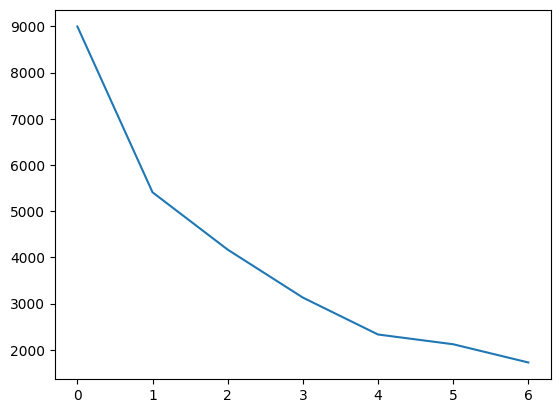

In [65]:
range_n_clusters = [2,3,4,5,6,7,8]

ssd = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    #SDD
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
#ssd
plt.plot(ssd) # x-axis represents the index

##### As per the Elbow curve 3 seems to be good choice

##### Using Silhouette Analysis


$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [66]:
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # silhoutte score
    silhoutte_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhoutte score is {1}".format(num_clusters, silhoutte_avg))

For n_clusters=2, the silhoutte score is 0.9293984525918874
For n_clusters=3, the silhoutte score is 0.6004291889189828
For n_clusters=4, the silhoutte score is 0.5976040206171827
For n_clusters=5, the silhoutte score is 0.6149580516850672
For n_clusters=6, the silhoutte score is 0.5919300618934865
For n_clusters=7, the silhoutte score is 0.5238551448871509
For n_clusters=8, the silhoutte score is 0.3974172603163068


##### Though cluster 2 has max silhoutte average and close to 1 but 2 might not be optimal from custer segmentation point of view and also from domain perspective as it would be too les

#### So based on both the SDD and Silhouette analysis, and domain perspective, 3 seems to be an optimal cluster number

#### Final model with 3 clusters

In [67]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [68]:
kmeans.labels_

array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

In [69]:
# assign the label
grouped_retail_df['Cluster_Id'] = kmeans.labels_
grouped_retail_df.head()

,CustomerID,Monetary,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<Axes: xlabel='Cluster_Id', ylabel='Monetary'>

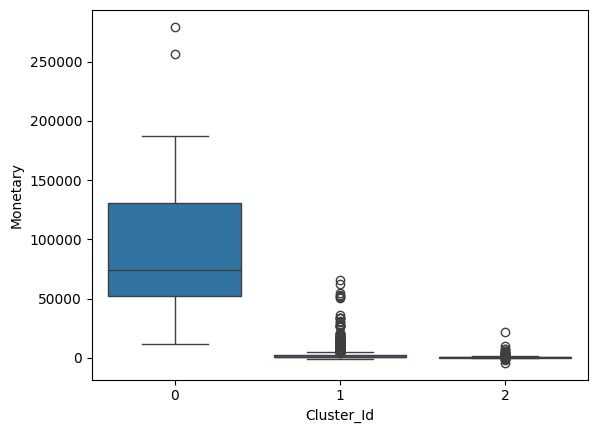

In [70]:
# plot box plot for clusters for monetary

sns.boxplot(x='Cluster_Id', y='Monetary', data=grouped_retail_df)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

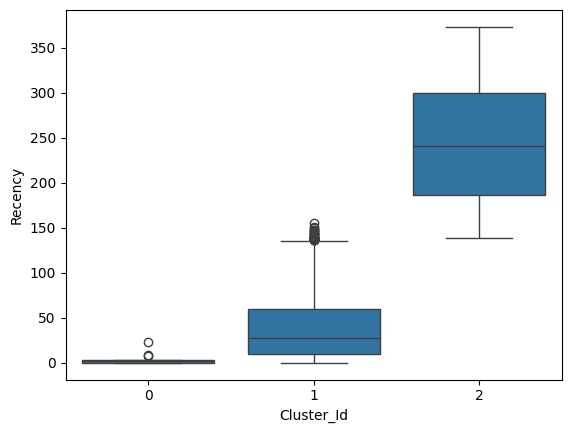

In [71]:
# next plot box plot for clusters for recency

sns.boxplot(x='Cluster_Id', y='Recency', data=grouped_retail_df)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

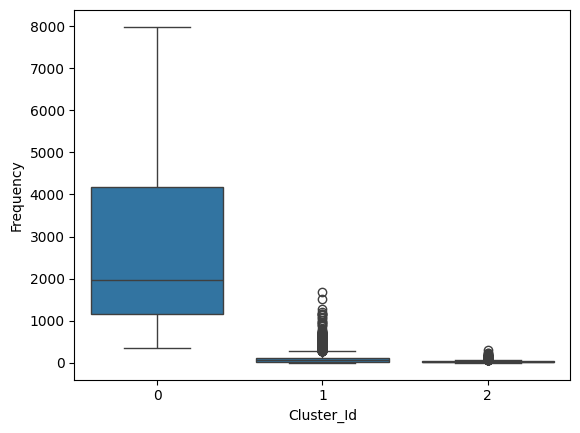

In [72]:
# finally plot box plot for clusters for frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=grouped_retail_df)

#### As we can see above that clusters are highly affected by outliers hence the distributions loooks highly skewed within 3 clusters. Let us try removing few outliers and retry

#### Removing statistical outliers for now by removing anything beyond 95 percentile. However this process should be done post discussion with domain expert or business may be

<Axes: ylabel='Monetary'>

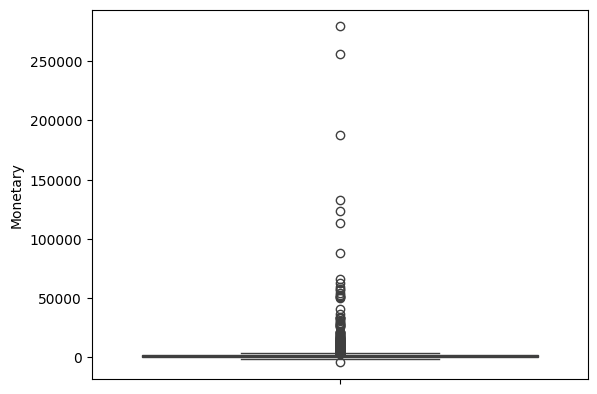

In [73]:
sns.boxplot(grouped_retail_df.Monetary)

In [74]:
# remove (statistical) outliers 
Q1 = grouped_retail_df.Monetary.quantile(0.05) # 5th percentile
Q3 = grouped_retail_df.Monetary.quantile(0.95) # 95th percentile

IQR = Q3 - Q1

grouped_retail_df = grouped_retail_df[(grouped_retail_df.Monetary >= Q1 - 1.5*IQR) & (grouped_retail_df.Monetary <= Q3 + 1.5*IQR)]

<Axes: ylabel='Monetary'>

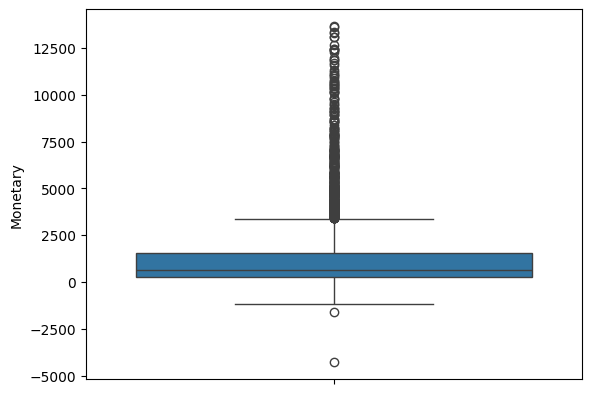

In [75]:
sns.boxplot(grouped_retail_df.Monetary)

In [76]:
# removing statistical outliers for Recency too
Q1 = grouped_retail_df.Recency.quantile(0.05) # 5th percentile
Q3 = grouped_retail_df.Recency.quantile(0.95) # 95th percentile

IQR = Q3 - Q1

grouped_retail_df = grouped_retail_df[(grouped_retail_df.Recency >= Q1 - 1.5*IQR) & (grouped_retail_df.Recency <= Q3 + 1.5*IQR)]

# removing statistical outliers for Freqeuncy too
Q1 = grouped_retail_df.Frequency.quantile(0.05) # 5th percentile
Q3 = grouped_retail_df.Frequency.quantile(0.95) # 95th percentile

IQR = Q3 - Q1

grouped_retail_df = grouped_retail_df[(grouped_retail_df.Frequency >= Q1 - 1.5*IQR) & (grouped_retail_df.Frequency <= Q3 + 1.5*IQR)]

<Axes: ylabel='Frequency'>

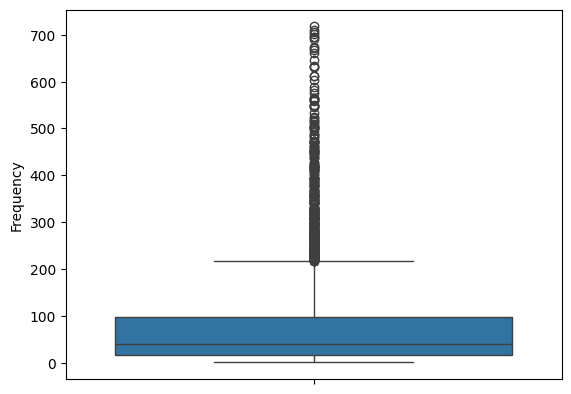

In [77]:
sns.boxplot(grouped_retail_df.Frequency)

<Axes: ylabel='Recency'>

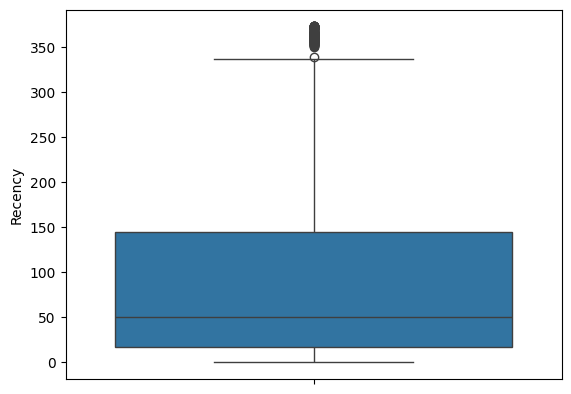

In [78]:
sns.boxplot(grouped_retail_df.Recency)

#### Now re-run the above steps again and check above

In [79]:
rfm_df2 = grouped_retail_df[['Recency','Frequency','Monetary']]

In [80]:
rfm_df2.head()

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [81]:
rfm_df2.shape

(4293, 3)

In [82]:
#fit_transform
rfm_df_scaled2 = scaler.fit_transform(rfm_df2)

In [83]:
rfm_df_scaled2.shape

(4293, 3)

In [84]:
# k-means with some arbitary k and random number of max iterations 

kmeans2 = KMeans(n_clusters=4, max_iter=50)
kmeans2.fit(rfm_df_scaled2)

KMeans(max_iter=50, n_clusters=4)

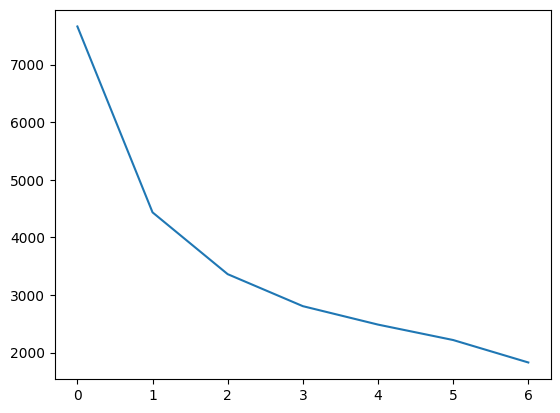

In [85]:
# Elbow/SDD analysis

range_n_clusters = [2,3,4,5,6,7,8]

ssd2 = []

for num_clusters in range_n_clusters:
    kmeans2 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans2.fit(rfm_df_scaled2)

    #SDD
    ssd2.append(kmeans2.inertia_)

# plot the SSDs for each n_clusters
#ssd
plt.plot(ssd2) # x-axis represents the index

In [86]:
# Silhouette Analysis
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans2 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans2.fit(rfm_df_scaled2)
    cluster_labels2 = kmeans2.labels_
    
    # silhoutte score
    silhoutte_avg2 = silhouette_score(rfm_df_scaled2, cluster_labels2)
    print("For n_clusters={0}, the silhoutte score is {1}".format(num_clusters, silhoutte_avg2))

For n_clusters=2, the silhoutte score is 0.5415858652525395
For n_clusters=3, the silhoutte score is 0.5085084004374336
For n_clusters=4, the silhoutte score is 0.48506020563508856
For n_clusters=5, the silhoutte score is 0.46488474498414245
For n_clusters=6, the silhoutte score is 0.41621655409916164
For n_clusters=7, the silhoutte score is 0.40500467476054847
For n_clusters=8, the silhoutte score is 0.41389527854943287


In [87]:
kmeans2 = KMeans(n_clusters=3, max_iter=50)
kmeans2.fit(rfm_df_scaled2)

KMeans(max_iter=50, n_clusters=3)

In [88]:
# assign the label
grouped_retail_df['Cluster_Id'] = kmeans2.labels_
grouped_retail_df.head()

,CustomerID,Monetary,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='Cluster_Id', ylabel='Monetary'>

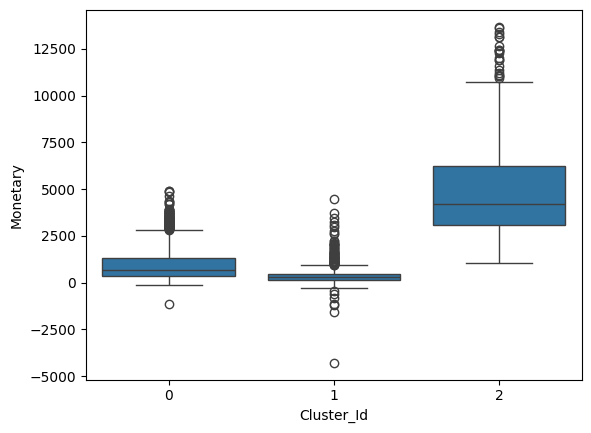

In [89]:
# plot box plot for clusters for monetary

sns.boxplot(x='Cluster_Id', y='Monetary', data=grouped_retail_df)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

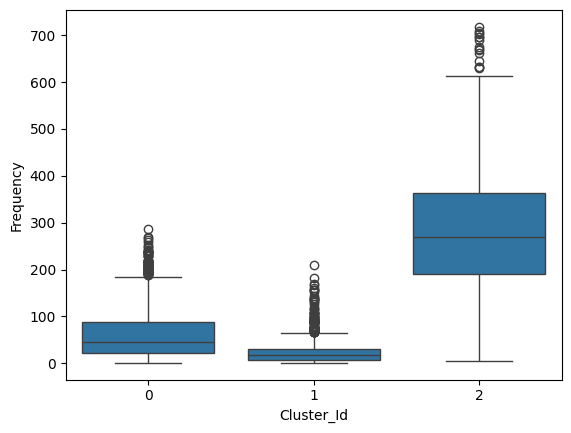

In [90]:
# finally plot box plot for clusters for frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=grouped_retail_df)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

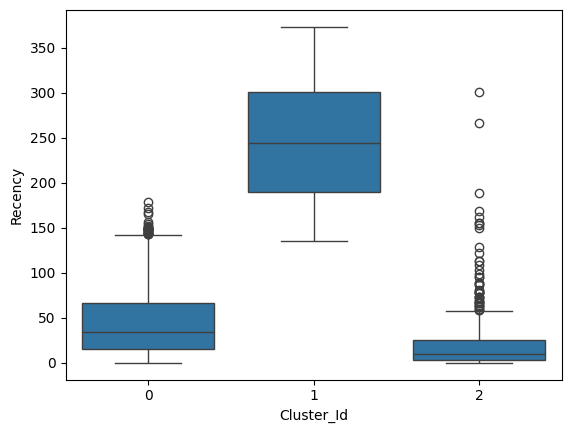

In [91]:
# next plot box plot for clusters for recency

sns.boxplot(x='Cluster_Id', y='Recency', data=grouped_retail_df)